# **Model Training and Performance Evaluation**


## **1. Loading Data:**


In [568]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [569]:
#Loading the data
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [570]:
#Listing the features of the dataset
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

## **2. Data Preprocessing & EDA**
Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

In [571]:
##describe() is used to view statistical details
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


The above obtained result shows that the most of the data is made of 0's & 1's except 'Domain' & 'URL_Depth' columns. The Domain column doesnt have any significance to the machine learning model training. So dropping the *'Domain'* column from the dataset. 

In [572]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()



To even out the distribution while splitting the data into training & testing sets, we need to shuffle it. This even evades the case of overfitting while model training.

In [573]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,1,0,1,1,1,1,0,0,1,0,1
3,0,0,1,4,0,0,0,0,1,1,1,1,0,0,1,0,0
4,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0


## **3. Splitting the Data**

In [574]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [575]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)


X_train.shape, X_test.shape

((8000, 16), (2000, 16))

In [576]:
from sklearn.model_selection import RepeatedKFold

#rkf = RepeatedKFold(n_splits=5,n_repeats=10, random_state=None)
#for train,test in rkf.split(X):
#    print("%s %s" % (train, test))


## **4. Machine Learning Models & Training**

The supervised machine learning models (classification) considered to train the dataset are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* XGBoost
* AdaBoost
* Gaussian Naive Bayes
* Support Vector Machines


In [577]:
#importing packages
from sklearn.metrics import accuracy_score

In [578]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

### **4.1. Decision Tree Classifier**
 Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.
 
In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [579]:
# Decision Tree model 
import numpy as np

import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
#from sklearn.metrics import auc
#from sklearn.metrics import plot_roc_curve
#from sklearn.model_selection import StratifiedKFold

# instantiate the model 
tree = DecisionTreeClassifier(min_impurity_decrease=0)

#cv = StratifiedKFold(n_splits=6)
#tprs = []
#aucs = []
#mean_fpr = np.linspace(0, 1, 100)


#fig, ax = plt.subplots()
#for i, (train, test) in enumerate(cv.split(X, y)):
#    tree.fit(X_train, y_train)
#    viz = plot_roc_curve(tree, X[test], y[test], name='ROC fold{}'.format(i), alpha=0.3, lw=1, ax=ax)
#    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
#    interp_tpr[0] = 0.0
#    tprs.append(interp_tpr)
#    aucs.append(viz.roc_auc)

#ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#        label='Chance', alpha=.8)

#mean_tpr = np.mean(tprs, axis=0)
#mean_tpr[-1] = 1.0
#mean_auc = auc(mean_fpr, mean_tpr)
#std_auc = np.std(aucs)
#ax.plot(mean_fpr, mean_tpr, color='b',
#        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
#        lw=2, alpha=.8)

#std_tpr = np.std(tprs, axis=0)
#tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
#tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
#ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
#                label=r'$\pm$ 1 std. dev.')

#ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
#       title="Receiver operating characteristic example")
#ax.legend(loc="lower right")
#plt.show()

#fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [580]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

**Performance Evaluation:**

In [581]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.869
Decision Tree: Accuracy on test Data: 0.854


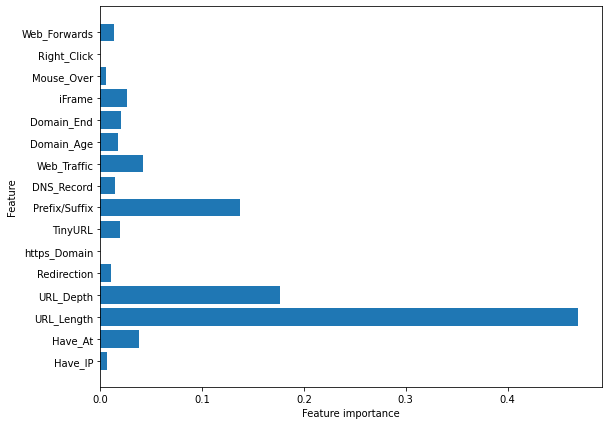

In [582]:
#checking the importance of each feature in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [583]:
#storing the results. 
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

### **4.2. Random Forest Classifier**
Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [584]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier()

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [585]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

**Performance Evaluation:**

In [586]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.869
Random forest: Accuracy on test Data: 0.853


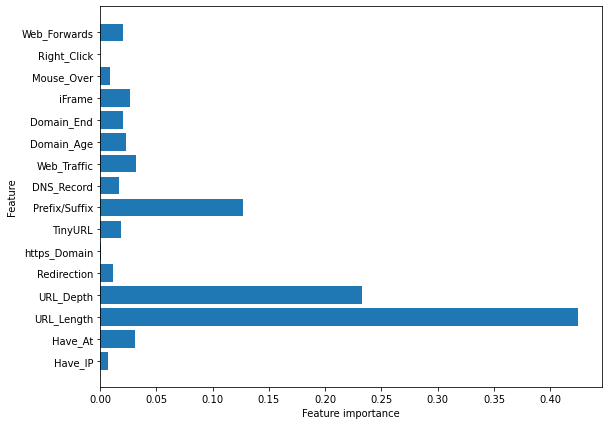

In [587]:
#checking the importance of each feature in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

**Storing the results:**

In [588]:
#storing the results.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

### **4.3. Multilayer Perceptrons (MLPs): Deep Learning**
Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [589]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]),max_iter=900)

# fit the model 
mlp.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.865
Multilayer Perceptrons: Accuracy on test Data: 0.848


In [590]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

**Performance Evaluation:**

In [591]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

**Feature Importance:**

Multilayer Perceptron doesn't have feature importance and depends on complex co-adaptations of weights during the training phase instead of measuring and comparing quality of splits Or a perceptron from Scikit can be used, which is a single layer neural network.

**Storing the results:**

In [592]:
#storing the results. 
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

### **4.4. XGBoost Classifier**
XGBoost is one of the most popular machine learning algorithms these days. XGBoost stands for eXtreme Gradient Boosting. Regardless of the type of prediction task at hand; regression or classification. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [593]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4, n_estimators=300, early_stopping_rounds=10)
#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=10,
              gamma=0, learning_rate=0.4, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [594]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

**Performance Evaluation:**

In [595]:
#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.866
XGBoost : Accuracy on test Data: 0.848


**Storing the results:**

In [596]:
#storing the results. 
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

###  **4.5. AdaBoost Classifier**

In [597]:
#XGBoost Classification model
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
hybrid_model_AB = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3),
    n_estimators=10
)
hybrid_model_AB.fit(X_train, y_train)
predicted_test_labels = hybrid_model_AB.predict(X_test)


In [598]:
#predicting the target value from the model for the samples
y_test_ab = hybrid_model_AB.predict(X_test)
y_train_ab = hybrid_model_AB.predict(X_train)

In [599]:
#computing the accuracy of the model performance
acc_train_ab = accuracy_score(y_train,y_train_ab)
acc_test_ab = accuracy_score(y_test,y_test_ab)

print("AdaBoost: Accuracy on training Data: {:.3f}".format(acc_train_ab))
print("AdaBoost : Accuracy on test Data: {:.3f}".format(acc_test_ab))

AdaBoost: Accuracy on training Data: 0.831
AdaBoost : Accuracy on test Data: 0.817


In [600]:
#storing the results. 
storeResults('AdaBoost', acc_train_ab, acc_test_ab)

### **4.6. Gaussian Naive Bayes Classifier**

In [601]:
#importing Naives Bayes Classifier model
from sklearn.naive_bayes import GaussianNB

#instantiate the model
gnb = GaussianNB()

#model fitting
gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [602]:
#predicting the target value from the model for the samples
y_test_gnb = gnb.predict(X_test)
y_train_gnb = gnb.predict(X_train)

**Performance Evaluation:**

In [603]:
#computing the accuracy of model
acc_train_gnb = accuracy_score(y_train,y_train_gnb)
acc_test_gnb = accuracy_score(y_test,y_test_gnb)

print("Gaussian Naive Bayes : Accuracy on training Data: {:.3f}".format(acc_train_gnb))
print("Gaussian Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_gnb))

Gaussian Naive Bayes : Accuracy on training Data: 0.793
Gaussian Naive Bayes : Accuracy on test Data: 0.788


**Storing the results:**

In [604]:
#storing the results. 
storeResults('Gaussian Naive Bayes', acc_train_gnb, acc_test_gnb)

### **4.7. Support Vector Machines**

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [605]:
#Support vector machine model
from sklearn.svm import SVC

 #instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=42,max_iter=-1)
#fit the model
svm.fit(X_train, y_train)

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))
#import pandas as pd
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.metrics import accuracy_score
#from sklearn.svm import SVC

# Create a template lit to store accuracies
#acc = []

# Iterate along a logarithmically spaced ranged

#for i in np.logspace(0,5, num = 0):
 #  if(i > 200 and i<1000):
    # Print out the number of iterations to use for the current loop
  #  print('Training model with iterations: ', i)
    # Create an SVC algorithm with the number of iterations for the current loop
   # svc = SVC(max_iter = i, class_weight='balanced')
    # Fit the algorithm to the data
    #svc.fit(X_train, y_train)
    #y_test_svc = svc.predict(X_test)
    #y_train_svc = svc.predict(X_train)
    #acc_train_svc = accuracy_score(y_train,y_train_svc)
    #acc_test_svc = accuracy_score(y_test,y_test_svc)



    # Append the current accuracy score to the template list
    #acc.append(accuracy_score(y_test, logreg.predict(X_test)) * 100)

# Convert the accuracy list to a series
#acc_train_svc = pd.Series(acc, index = np.logspace(0,5, num = 0))
# Set the plot size
#plt.figure(figsize = (15,10))
# Set the plot title
#title = 'Graph to show the accuracy of the SVC model as number of iterations increases\nfinal accuracy: ' + str(acc.iloc[-1])
#plt.title(title)
# Set the xlabel and ylabel
#plt.xlabel('Number of iterations')
#plt.ylabel('Accuracy score')
# Plot the graph
#acc_train_svc.plot.line()
#plt.show()

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.798


In [606]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

**Performance Evaluation:**

In [607]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.803
SVM : Accuracy on test Data: 0.798


**Storing the results:**

In [608]:
#storing the results. 
storeResults('SVM', acc_train_svm, acc_test_svm)

### **4.8. Nearest Neighbor**

## **5. Comparision of Models**
Using a simple dataframe to compare the above models.

In [609]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.854
1,Random Forest,0.869,0.852
2,Multilayer Perceptrons,0.864,0.848
3,XGBoost,0.866,0.848
4,AdaBoost,0.831,0.817
5,Gaussian Naive Bayes,0.793,0.788
6,SVM,0.803,0.798


# **6. Hybrid Models**

##**6.1. Stacking all models into 1 Hybrid model**

### **Model-6.1.1. : Gaussian Naive Bayes and Random Forest**
Below is the implementation of combination of Gaussian Naive Bayes and Random Forest algorithms.

In [610]:
import mlxtend as md
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression

In [611]:
# defining meta-classifier

lr = LogisticRegression(solver='lbfgs', max_iter=700)  
clf_stack = StackingClassifier(classifiers =[forest, gnb], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

In [612]:
 # training of stacked model
model_stack = clf_stack.fit(X_train, y_train)
pred_stack_train = model_stack.predict(X_train)  
pred_stack_test = model_stack.predict(X_test) 

 **Performance Evaluation:**

In [613]:
#computing the accuracy of the model performance

acc_stack_train = accuracy_score(y_train, pred_stack_train)
acc_stack_test =  accuracy_score(y_test, pred_stack_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stack_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stack_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.859


In [614]:
#computing the accuracy of the model performance

acc_stack_train = accuracy_score(y_train, pred_stack_train)
acc_stack_test =  accuracy_score(y_test, pred_stack_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stack_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stack_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.859


 **Storing the results:**

In [615]:
#storing the results. 
storeResults('RF & NB', acc_stack_train, acc_stack_test)

###**Model-6.1.2. : Stacking Model-A with Decision Forest**

In [616]:
# defining meta-classifier

lrx = LogisticRegression(solver='lbfgs', max_iter=800)  
clf_stackx = StackingClassifier(classifiers =[clf_stack, tree], meta_classifier = lrx, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackx = clf_stackx.fit(X_train, y_train)
pred_stackx_train = model_stackx.predict(X_train)  
pred_stackx_test = model_stackx.predict(X_test) 

acc_stackx_train = accuracy_score(y_train, pred_stackx_train)
acc_stackx_test =  accuracy_score(y_test, pred_stackx_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackx_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackx_test))

Accuray score of Stacked model: 0.869
Accuray score of Stacked model: 0.855


In [617]:
# training of stacked model
model_stackx = clf_stackx.fit(X_train, y_train)
pred_stackx_train = model_stackx.predict(X_train)  
pred_stackx_test = model_stackx.predict(X_test) 

 **Performance Evaluation:**

In [618]:
#computing the accuracy of the model performance

acc_stackx_train = accuracy_score(y_train, pred_stackx_train)
acc_stackx_test =  accuracy_score(y_test, pred_stackx_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackx_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackx_test))

Accuray score of Stacked model: 0.869
Accuray score of Stacked model: 0.855


**Storing the results:**

In [619]:
#storing the results. 
storeResults('DT & RF & NB', acc_stackx_train, acc_stackx_test)

### **Model-6.1.3. : Stacking Model-B with Multilayer Perceptrons**

In [620]:
# defining meta-classifier

lry = LogisticRegression(solver='lbfgs', max_iter=500)  
clf_stacky = StackingClassifier(classifiers =[clf_stackx, mlp], meta_classifier = lry, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stacky = clf_stacky.fit(X_train, y_train)
pred_stacky_train = model_stacky.predict(X_train)  
pred_stacky_test = model_stacky.predict(X_test) 

#computing the accuracy of the model performance

acc_stacky_train = accuracy_score(y_train, pred_stacky_train)
acc_stacky_test =  accuracy_score(y_test, pred_stacky_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stacky_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stacky_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.858


In [621]:
# training of stacked model
model_stacky = clf_stacky.fit(X_train, y_train)
pred_stacky_train = model_stacky.predict(X_train)  
pred_stacky_test = model_stacky.predict(X_test) 

**Performance Evaluation:**

In [622]:
#computing the accuracy of the model performance

acc_stacky_train = accuracy_score(y_train, pred_stacky_train)
acc_stacky_test =  accuracy_score(y_test, pred_stacky_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stacky_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stacky_test))

Accuray score of Stacked model: 0.869
Accuray score of Stacked model: 0.858


**Storing the results:**

In [623]:
#storing the results. 
storeResults('MLP & DT & RF & NB', acc_stacky_train, acc_stacky_test)

### **Model-6.1.4. : Stacking Model-C with XGBoost**

In [624]:
# defining meta-classifier

lrz = LogisticRegression(solver='lbfgs', max_iter=1000)  
clf_stackz = StackingClassifier(classifiers =[clf_stacky, xgb], meta_classifier = lrz, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackz = clf_stackz.fit(X_train, y_train)
pred_stackz_train = model_stackz.predict(X_train)  
pred_stackz_test = model_stackz.predict(X_test) 

#computing the accuracy of the model performance

acc_stackz_train = accuracy_score(y_train, pred_stackz_train)
acc_stackz_test =  accuracy_score(y_test, pred_stackz_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.857


In [625]:
# training of stacked model
model_stackz = clf_stackz.fit(X_train, y_train)
pred_stackz_train = model_stackz.predict(X_train)  
pred_stackz_test = model_stackz.predict(X_test) 

**Performance Evaluation:**

In [626]:
#computing the accuracy of the model performance

acc_stackz_train = accuracy_score(y_train, pred_stackz_train)
acc_stackz_test =  accuracy_score(y_test, pred_stackz_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.857


**Storing results:**

In [627]:
#storing the results. 
storeResults('XGB & MLP & DT & RF & NB', acc_stackz_train, acc_stackz_test)

### **Model-6.1.5. : Stacking Model-D with AdaBoost Classifier**

In [628]:
# defining meta-classifier

lrm = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackm = StackingClassifier(classifiers =[clf_stackz, hybrid_model_AB], meta_classifier = lrm, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackm = clf_stackm.fit(X_train, y_train)
pred_stackm_train = model_stackm.predict(X_train)  
pred_stackm_test = model_stackm.predict(X_test) 

#computing the accuracy of the model performance

acc_stackm_train = accuracy_score(y_train, pred_stackm_train)
acc_stackm_test =  accuracy_score(y_test, pred_stackm_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.857


In [629]:
# training of stacked model
model_stackm = clf_stackm.fit(X_train, y_train)
pred_stackm_train = model_stackm.predict(X_train)  
pred_stackm_test = model_stackm.predict(X_test) 

**Performance Evaluation:**

In [630]:
#computing the accuracy of the model performance

acc_stackm_train = accuracy_score(y_train, pred_stackm_train)
acc_stackm_test =  accuracy_score(y_test, pred_stackm_test) 

print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

Accuray score of Stacked model: 0.868
Accuray score of Stacked model: 0.857


**Storing the result:**

In [631]:
#storing the results. 
storeResults('ADB & XGB & MLP & DT & RF & NB', acc_stackm_train, acc_stackm_test)

## **Comparison of models:**

In [632]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.854
1,Random Forest,0.869,0.852
2,Multilayer Perceptrons,0.864,0.848
3,XGBoost,0.866,0.848
4,AdaBoost,0.831,0.817
5,Gaussian Naive Bayes,0.793,0.788
6,SVM,0.803,0.798
7,RF & NB,0.868,0.859
8,DT & RF & NB,0.869,0.855
9,MLP & DT & RF & NB,0.868,0.858


In [633]:
#Sorting the datafram on accuracy
results.sort_values(by=['Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.854
1,Random Forest,0.869,0.852
8,DT & RF & NB,0.869,0.855
7,RF & NB,0.868,0.859
9,MLP & DT & RF & NB,0.868,0.858
10,XGB & MLP & DT & RF & NB,0.868,0.857
11,ADB & XGB & MLP & DT & RF & NB,0.867,0.852
3,XGBoost,0.866,0.848
2,Multilayer Perceptrons,0.864,0.848
4,AdaBoost,0.831,0.817


In [634]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
7,RF & NB,0.868,0.859
9,MLP & DT & RF & NB,0.868,0.858
10,XGB & MLP & DT & RF & NB,0.868,0.857
8,DT & RF & NB,0.869,0.855
0,Decision Tree,0.869,0.854
1,Random Forest,0.869,0.852
11,ADB & XGB & MLP & DT & RF & NB,0.867,0.852
2,Multilayer Perceptrons,0.864,0.848
3,XGBoost,0.866,0.848
4,AdaBoost,0.831,0.817


## **6.2. Stacking 2 Models together with better accuracies**

### **Model-6.2.1. : Gaussian Naive Bayes and Random Forest**

In [635]:
# defining meta-classifier

lr = LogisticRegression(solver='lbfgs', max_iter=300)  
clf_stack = StackingClassifier(classifiers =[forest, gnb], meta_classifier = lr, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stack = clf_stack.fit(X_train, y_train)
pred_stack_train = model_stack.predict(X_train)  
pred_stack_test = model_stack.predict(X_test) 

#computing the accuracy of the model performance

acc_stack_train = accuracy_score(y_train, pred_stack_train)
acc_stack_test =  accuracy_score(y_test, pred_stack_test) 

print("NB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stack_train))
print("NB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stack_test))

NB & RF : Accuray score of Stacked model: 0.868
NB & RF : Accuray score of Stacked model: 0.860


**Storing the result:**

In [636]:
#storing the results. 
storeResults('Random forest & Naive Bayes', acc_stack_train, acc_stack_test)

### **Model-6.2.2. : Random Forest and Decision Tree**

In [637]:
# defining meta-classifier

lrx = LogisticRegression(solver='lbfgs', max_iter=600)  
clf_stackx = StackingClassifier(classifiers =[forest, tree], meta_classifier = lrx, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackx = clf_stackx.fit(X_train, y_train)
pred_stackx_train = model_stackx.predict(X_train)  
pred_stackx_test = model_stackx.predict(X_test) 

#computing the accuracy of the model performance

acc_stackx_train = accuracy_score(y_train, pred_stackx_train)
acc_stackx_test =  accuracy_score(y_test, pred_stackx_test) 

print("DT & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackx_train))
print("DT & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackx_test))

DT & RF : Accuray score of Stacked model: 0.869
DT & RF : Accuray score of Stacked model: 0.860


**Storing the result:**

In [638]:
#storing the results. 
storeResults('Decision Tree & Randome Forest', acc_stackx_train, acc_stackx_test)

### **Model-6.2.3. : Random Forest and XGBoost**

In [639]:
# defining meta-classifier

lry = LogisticRegression(solver='lbfgs', max_iter=1000)  
clf_stacky = StackingClassifier(classifiers =[forest, xgb], meta_classifier = lry, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stacky = clf_stacky.fit(X_train, y_train)
pred_stacky_train = model_stacky.predict(X_train)  
pred_stacky_test = model_stacky.predict(X_test) 

#computing the accuracy of the model performance

acc_stacky_train = accuracy_score(y_train, pred_stacky_train)
acc_stacky_test =  accuracy_score(y_test, pred_stacky_test) 

print("XGB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stacky_train))
print("XGB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stacky_test))

XGB & RF : Accuray score of Stacked model: 0.868
XGB & RF : Accuray score of Stacked model: 0.859


**Storing the result:**

In [640]:
#storing the results. 
storeResults('XGBoost & Random Forest', acc_stacky_train, acc_stacky_test)

### **Model-6.2.4. : Decision Tree and AdaBoost**

In [641]:
# defining meta-classifier

lrz = LogisticRegression(solver='lbfgs', max_iter=800)  
clf_stackz = StackingClassifier(classifiers =[tree, hybrid_model_AB], meta_classifier = lrz, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackz = clf_stackz.fit(X_train, y_train)
pred_stackz_train = model_stackz.predict(X_train)  
pred_stackz_test = model_stackz.predict(X_test) 

#computing the accuracy of the model performance

acc_stackz_train = accuracy_score(y_train, pred_stackz_train)
acc_stackz_test =  accuracy_score(y_test, pred_stackz_test) 

print("DT & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("DT & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

DT & ADB : Accuray score of Stacked model: 0.869
DT & ADB : Accuray score of Stacked model: 0.859


**Storing the result:**

In [642]:
#storing the results. 
storeResults('Decision Tree & AdaBoost', acc_stackz_train, acc_stackz_test)

### **Model-6.2.5. : Random Forest and AdaBoost**

In [643]:
# defining meta-classifier

lrm = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stackm = StackingClassifier(classifiers =[forest, hybrid_model_AB], meta_classifier = lrm, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackm = clf_stackm.fit(X_train, y_train)
pred_stackm_train = model_stackm.predict(X_train)  
pred_stackm_test = model_stackm.predict(X_test) 

#computing the accuracy of the model performance

acc_stackm_train = accuracy_score(y_train, pred_stackm_train)
acc_stackm_test =  accuracy_score(y_test, pred_stackm_test) 

print("ADB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackz_train))
print("ADB & RF : Accuray score of Stacked model: {:.3f}".format(acc_stackz_test))

ADB & RF : Accuray score of Stacked model: 0.869
ADB & RF : Accuray score of Stacked model: 0.859


**Storing the result:**

In [644]:
#storing the results. 
storeResults('AdaBoost & Random Forest', acc_stackm_train, acc_stackm_test)

### **Model-6.2.6. : Decision Tree and XGBoost**

In [645]:
# defining meta-classifier

lra = LogisticRegression(solver='lbfgs', max_iter=400)  
clf_stacka = StackingClassifier(classifiers =[tree, xgb], meta_classifier = lra, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stacka = clf_stacka.fit(X_train, y_train)
pred_stacka_train = model_stacka.predict(X_train)  
pred_stacka_test = model_stacka.predict(X_test) 

#computing the accuracy of the model performance

acc_stacka_train = accuracy_score(y_train, pred_stacka_train)
acc_stacka_test =  accuracy_score(y_test, pred_stacka_test) 

print("XGB & DT : Accuray score of Stacked model: {:.3f}".format(acc_stacka_train))
print("XGB & DT : Accuray score of Stacked model: {:.3f}".format(acc_stacka_test))

XGB & DT : Accuray score of Stacked model: 0.869
XGB & DT : Accuray score of Stacked model: 0.858


**Storing the result:**

In [646]:
#storing the results. 
storeResults('XGBoost & Decision Tree', acc_stacka_train, acc_stacka_test)

### **Model-6.2.7. : XGBoost and AdaBoost**

In [647]:
# defining meta-classifier

lrb = LogisticRegression(solver='lbfgs', max_iter=500)  
clf_stackb = StackingClassifier(classifiers =[xgb, hybrid_model_AB], meta_classifier = lrb, use_probas = True, use_features_in_secondary = True)

# training of stacked model
model_stackb = clf_stackb.fit(X_train, y_train)
pred_stackb_train = model_stackb.predict(X_train)  
pred_stackb_test = model_stackb.predict(X_test) 

#computing the accuracy of the model performance

acc_stackb_train = accuracy_score(y_train, pred_stackb_train)
acc_stackb_test =  accuracy_score(y_test, pred_stackb_test) 

print("XGB & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackb_train))
print("XGB & ADB : Accuray score of Stacked model: {:.3f}".format(acc_stackb_test))

XGB & ADB : Accuray score of Stacked model: 0.866
XGB & ADB : Accuray score of Stacked model: 0.854


**Storing the result:**

In [648]:
#storing the results. 
storeResults('XGBoost & AdaBoost', acc_stackb_train, acc_stackb_test)

## **Comparison of models:**

In [649]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.854
1,Random Forest,0.869,0.852
2,Multilayer Perceptrons,0.864,0.848
3,XGBoost,0.866,0.848
4,AdaBoost,0.831,0.817
5,Gaussian Naive Bayes,0.793,0.788
6,SVM,0.803,0.798
7,RF & NB,0.868,0.859
8,DT & RF & NB,0.869,0.855
9,MLP & DT & RF & NB,0.868,0.858


In [650]:
#Sorting the datafram on accuracy
results.sort_values(by=['Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.869,0.854
16,AdaBoost & Random Forest,0.869,0.856
15,Decision Tree & AdaBoost,0.869,0.858
13,Decision Tree & Randome Forest,0.869,0.860
8,DT & RF & NB,0.869,0.855
1,Random Forest,0.869,0.852
10,XGB & MLP & DT & RF & NB,0.868,0.857
17,XGBoost & Decision Tree,0.868,0.858
14,XGBoost & Random Forest,0.868,0.858
12,Random forest & Naive Bayes,0.868,0.860


In [651]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
13,Decision Tree & Randome Forest,0.869,0.860
12,Random forest & Naive Bayes,0.868,0.860
7,RF & NB,0.868,0.859
9,MLP & DT & RF & NB,0.868,0.858
17,XGBoost & Decision Tree,0.868,0.858
15,Decision Tree & AdaBoost,0.869,0.858
14,XGBoost & Random Forest,0.868,0.858
10,XGB & MLP & DT & RF & NB,0.868,0.857
16,AdaBoost & Random Forest,0.869,0.856
8,DT & RF & NB,0.869,0.855


In [652]:
from urllib.parse import urlparse,urlencode
import ipaddress
import re

# 1.Domain of the URL (Domain) 
def getDomain(url):  
  domain = urlparse(url).netloc
  if re.match(r"^www.",domain):
	       domain = domain.replace("www.","")
  return domain

In [653]:
# 2.Checks for IP address in URL (Have_IP)
def havingIP(url):
  try:
    ipaddress.ip_address(url)
    ip = 1
  except:
    ip = 0
  return ip

In [654]:
# 3.Checks the presence of @ in URL (Have_At)
def haveAtSign(url):
  if "@" in url:
    at = 1    
  else:
    at = 0    
  return at

In [655]:
# 4.Finding the length of URL and categorizing (URL_Length)
def getLength(url):
  if len(url) < 54:
    length = 0            
  else:
    length = 1            
  return length

In [656]:
# 5.Gives number of '/' in URL (URL_Depth)
def getDepth(url):
  s = urlparse(url).path.split('/')
  depth = 0
  for j in range(len(s)):
    if len(s[j]) != 0:
      depth = depth+1
  return depth

In [657]:
# 6.Checking for redirection '//' in the url (Redirection)
def redirection(url):
  pos = url.rfind('//')
  if pos > 6:
    if pos > 7:
      return 1
    else:
      return 0
  else:
    return 0

In [658]:
# 7.Existence of “HTTPS” Token in the Domain Part of the URL (https_Domain)
def httpDomain(url):
  domain = urlparse(url).netloc
  if 'https' in domain:
    return 1
  else:
    return 0

In [659]:
#listing shortening services
shortening_services = r"bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|" \
                      r"yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|" \
                      r"short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|" \
                      r"doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|db\.tt|" \
                      r"qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|q\.gs|is\.gd|" \
                      r"po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|x\.co|" \
                      r"prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|" \
                      r"tr\.im|link\.zip\.net"

In [660]:
# 8. Checking for Shortening Services in URL (Tiny_URL)
def tinyURL(url):
    match=re.search(shortening_services,url)
    if match:
        return 1
    else:
        return 0

In [661]:
# 9.Checking for Prefix or Suffix Separated by (-) in the Domain (Prefix/Suffix)
def prefixSuffix(url):
    if '-' in urlparse(url).netloc:
        return 1            # phishing
    else:
        return 0            # legitimate

In [662]:
import re
from bs4 import BeautifulSoup
#import whois
import urllib
import urllib.request
from datetime import datetime

In [663]:
!pip install python-whois

In [664]:
import whois

In [665]:
# 10.Web traffic (Web_Traffic)
def web_traffic(url):
  try:
    #Filling the whitespaces in the URL if any
    url = urllib.parse.quote(url)
    rank = BeautifulSoup(urllib.request.urlopen("http://data.alexa.com/data?cli=10&dat=s&url=" + url).read(), "xml").find(
        "REACH")['RANK']
    rank = int(rank)
  except TypeError:
        return 1
  if rank <100000:
    return 1
  else:
    return 0

In [666]:
# 11.Survival time of domain: The difference between termination time and creation time (Domain_Age)  
def domainAge(domain_name):
  creation_date = domain_name.creation_date
  expiration_date = domain_name.expiration_date
  if (isinstance(creation_date,str) or isinstance(expiration_date,str)):
    try:
      creation_date = datetime.strptime(creation_date,'%Y-%m-%d')
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if ((expiration_date is None) or (creation_date is None)):
      return 1
  elif ((type(expiration_date) is list) or (type(creation_date) is list)):
      return 1
  else:
    ageofdomain = abs((expiration_date - creation_date).days)
    if ((ageofdomain/30) < 6):
      age = 1
    else:
      age = 0
  return age

In [667]:
# 12.End time of domain: The difference between termination time and current time (Domain_End) 
def domainEnd(domain_name):
  expiration_date = domain_name.expiration_date
  if isinstance(expiration_date,str):
    try:
      expiration_date = datetime.strptime(expiration_date,"%Y-%m-%d")
    except:
      return 1
  if (expiration_date is None):
      return 1
  elif (type(expiration_date) is list):
      return 1
  else:
    today = datetime.now()
    end = abs((expiration_date - today).days)
    if ((end/30) < 6):
      end = 0
    else:
      end = 1
  return end

In [668]:
import requests

In [669]:
# 13. IFrame Redirection (iFrame)
def iframe(response):
  if response == "":
      return 1
  else:
      if re.findall(r"[<iframe>|<frameBorder>]", response.text):
          return 0
      else:
          return 1

In [670]:
def mouseOver(response): 
  if response == "" :
    return 1
  else:
    if re.findall("<script>.+onmouseover.+</script>", response.text):
      return 1
    else:
      return 0

In [671]:
# 15.Checks the status of the right click attribute (Right_Click)
def rightClick(response):
  if response == "":
    return 1
  else:
    if re.findall(r"event.button ?== ?2", response.text):
      return 0
    else:
      return 1

In [672]:
# 16.Checks the number of forwardings (Web_Forwards)    
def forwarding(response):
  if response == "":
    return 1
  else:
    if len(response.history) <= 2:
      return 0
    else:
      return 1

In [673]:
#Function to extract features
def featureExtraction(url):

  features = []
  #Address bar based features (10)
  features.append(getDomain(url))
  features.append(havingIP(url))
  features.append(haveAtSign(url))
  features.append(getLength(url))
  features.append(getDepth(url))
  features.append(redirection(url))
  features.append(httpDomain(url))
  features.append(tinyURL(url))
  features.append(prefixSuffix(url))
  
  #Domain based features (4)
  dns = 0
  try:
    domain_name = whois.whois(urlparse(url).netloc)
  except:
    dns = 1

  features.append(dns)
  features.append(web_traffic(url))
  features.append(1 if dns == 1 else domainAge(domain_name))
  features.append(1 if dns == 1 else domainEnd(domain_name))
  
  # HTML & Javascript based features
  try:
    response = requests.get(url)
  except:
    response = ""

  features.append(iframe(response))
  features.append(mouseOver(response))
  features.append(rightClick(response))
  features.append(forwarding(response))
  
  return features

In [674]:
import pandas as pd

In [675]:
feature_names = ['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth','Redirection', 
                      'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Web_Traffic', 
                      'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over','Right_Click', 'Web_Forwards']
test_url = []
tt_url = 'https://www.google.com'
test_url.append(featureExtraction(tt_url))

tested = pd.DataFrame(test_url,columns = feature_names)
testt = tested.drop(['Domain'], axis = 1).copy()
testt.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards
0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0


In [676]:
answer = forest.predict(testt)
print(answer)

answera = tree.predict(testt)
print(answera)

answerb = mlp.predict(testt)
print(answerb)

answerc = xgb.predict(testt)
print(answerc)

answerd = hybrid_model_AB.predict(testt)
print(answerd)

answere = gnb.predict(testt)
print(answere)

answerh = svm.predict(testt)
print(answerh)

answer1 = model_stackm.predict(testt)
print(answer1)

answer2 = model_stackx.predict(testt)
print(answer2)

answer3 = model_stacky.predict(testt)
print(answer3)

answer4 = model_stackz.predict(testt)
print(answer4)

answer5 = model_stacka.predict(testt)
print(answer5)

answer6 = model_stackb.predict(testt)
print(answer6)

[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
